In [2]:
import requests

# URLs of the files
sample_image_cat = 'https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/cat.jpg'
sample_image_dog = 'https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/dog.jpg'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(sample_image_cat, 'cat.jpg')
download_file(sample_image_dog, 'dog.jpg')

Downloaded cat.jpg from https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/cat.jpg
Downloaded dog.jpg from https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/dog.jpg


# PartA: Image Processing Warm-up

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # !pip install opencv-python
from PIL import Image

In [4]:
# Utility function to display images side by side
def display_images(images, titles, figsize=(15, 5)):
    """
    Display multiple images in a row
    Args:
        images: List of images to display
        titles: List of titles for each image
        figsize: Figure size (width, height)
    """
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    if len(images) == 1:
        axes = [axes]

    for ax, img, title in zip(axes, images, titles):
        if len(img.shape) == 2:  # Grayscale image
            ax.imshow(img, cmap='gray')
        else:  # Color image
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
# Choose your cat or dog team process one of the image
path = "cat.jpg"
path = "dog.jpg"

# 1. Reading Images

In [6]:
# Read image using OpenCV (BGR format)
img_cv = cv2.imread(path)

# Read image using PIL (RGB format)
img_pil = Image.open(path)
img_pil_array = np.array(img_pil)


array([[[215, 220, 223],
        [215, 220, 223],
        [215, 220, 223],
        ...,
        [ 91, 115, 151],
        [107, 128, 166],
        [ 90, 111, 149]],

       [[215, 220, 223],
        [215, 220, 223],
        [215, 220, 223],
        ...,
        [ 87, 111, 147],
        [ 66,  87, 125],
        [ 54,  75, 113]],

       [[215, 220, 223],
        [215, 220, 223],
        [215, 220, 223],
        ...,
        [ 65,  87, 123],
        [ 47,  66, 103],
        [ 43,  62,  99]],

       ...,

       [[213, 213, 219],
        [213, 213, 219],
        [213, 213, 219],
        ...,
        [199, 206, 215],
        [199, 206, 215],
        [199, 206, 215]],

       [[210, 210, 216],
        [210, 210, 216],
        [210, 210, 216],
        ...,
        [199, 204, 213],
        [199, 204, 213],
        [199, 204, 213]],

       [[210, 210, 216],
        [210, 210, 216],
        [210, 210, 216],
        ...,
        [199, 204, 213],
        [199, 204, 213],
        [199, 204, 213]]], dtype=uint8)
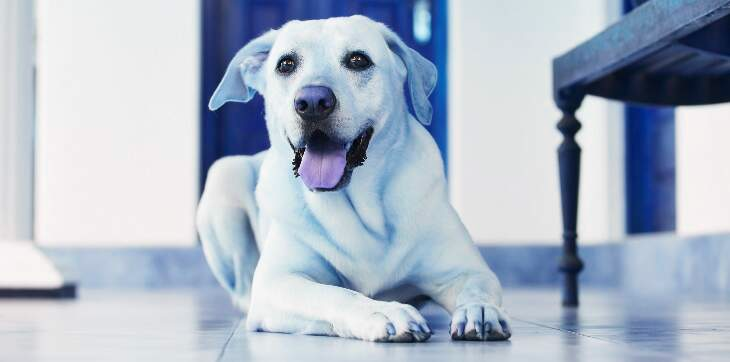

In [12]:
img_cv

In [14]:
height = img_cv.shape[0]
width = img_cv.shape[1]
channels = img_cv.shape[2]
channels

3

In [8]:
# What the size of the image (How many channels)? On how many bits are encodded the pixel?
print(f"\nImage Dimensions:")
print(f"Height: {height} pixels")
print(f"Width: {width} pixels")
print(f"Channels: {channels}")
print(f"Total pixels: {height * width}")
print(f"bits depth:", img_cv.dtype)


Image Dimensions:
Height: 362 pixels
Width: 730 pixels
Channels: 3
Total pixels: 264260
bits depth: uint8


In [ ]:
# What the average of Red, of Green, of Blue?

for channel in range(3):
    channel_data =
    print(f"  Mean: {channel_data.mean():.2f}")

In [ ]:
display_images([img_cv], [path])

# 2. Basic Image Manipulations

In [ ]:
height, width, channels = img_cv.shape

# Convert to grayscale
img_gray =

# Rotate image 45deg
# Get the image center and create the rotation matrix
img_rotated =

# Flip image horizontally
img_flipped =

# Display original and manipulated images
display_images(
    [img_cv, img_gray, img_rotated, img_flipped],
    ['Original', 'Grayscale', 'Rotated 45°', 'Flipped']
)



# 3. Channel Splitting and Histograms

In [ ]:
b, g, r = cv2.split(img_cv)

# Display individual channels
display_images(
    [b, g, r],
    ['Blue Channel', 'Green Channel', 'Red Channel']
)


In [ ]:
# Plot histograms for each channel
plt.figure(figsize=(15, 5))
colors = ['b', 'g', 'r']
channels = [b, g, r]
titles = ['Blue', 'Green', 'Red']

for idx, (channel, color, title) in enumerate(zip(channels, colors, titles)):
    plt.subplot(1, 3, idx + 1)
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.7)
    plt.title(f'{title} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Basic Image Transformations

In [ ]:
# Resize image to width//2, height//2
img_resized = cv2.resize(img_cv, (width//2, height//2))

# Apply Gaussian blur
img_blurred = cv2.GaussianBlur(img_cv, (5, 5), 0)

# Apply edge detection
img_edges = cv2.Canny(img_cv, 100, 200)

# Display transformations
display_images(
    [img_resized, img_blurred, img_edges],
    ['Resized (50%)', 'Gaussian Blur', 'Edge Detection']
)

# Part B: Convolution Warm-up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

In [ ]:
def apply_kernel(image, kernel):
    """
    Apply convolution with given kernel and return result
    """
    return convolve2d(image, kernel, mode='same', boundary='wrap')

### Simple geometric image forms

In [ ]:
size = 20
# Create a simple cross pattern
cross = np.zeros((size, size))
cross[size//2, :] = 1
cross[:, size//2] = 1

# Create a diagonal line
diagonal = np.eye(size)

# Create a box
box = np.zeros((size, size))
box[size//4:3*size//4, size//4:3*size//4] = 1

# Display original patterns
display_images(
    [cross, diagonal, box],
    ['Cross Pattern', 'Diagonal Pattern', 'Box Pattern']
)

NameError: name 'display_images' is not defined

### Common convolution kernels

In [ ]:
# Edge detection kernels
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Sharpening kernel
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Gaussian blur kernel (3x3)
gaussian = np.array([
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]
])

# Display kernels
display_images(
    [sobel_x, sobel_y, sharpen, gaussian],
    ['Sobel X', 'Sobel Y', 'Sharpen', 'Gaussian'],
    figsize=(20, 5)
)

In [ ]:
# Apply convolutions to cross pattern
# ----------------------------------
# Apply each kernel to the cross pattern
cross_sobel_x = apply_kernel(cross, sobel_x)
cross_sobel_y = apply_kernel(cross, sobel_y)
cross_sharpen = apply_kernel(cross, sharpen)
cross_gaussian = apply_kernel(cross, gaussian)

display_images(
    [cross, cross_sobel_x, cross_sobel_y, cross_sharpen, cross_gaussian],
    ['Original Cross', 'Sobel X', 'Sobel Y', 'Sharpened', 'Gaussian Blur'],
    figsize=(25, 5)
)

In [ ]:
# Apply convolutions to diagonal pattern
# -------------------------------------
diag_sobel_x = apply_kernel(diagonal, sobel_x)
diag_sobel_y = apply_kernel(diagonal, sobel_y)
diag_sharpen = apply_kernel(diagonal, sharpen)
diag_gaussian = apply_kernel(diagonal, gaussian)

display_images(
    [diagonal, diag_sobel_x, diag_sobel_y, diag_sharpen, diag_gaussian],
    ['Original Diagonal', 'Sobel X', 'Sobel Y', 'Sharpened', 'Gaussian Blur'],
    figsize=(25, 5)
)

In [ ]:
# Apply convolutions to box pattern
# --------------------------------
box_sobel_x = apply_kernel(box, sobel_x)
box_sobel_y = apply_kernel(box, sobel_y)
box_sharpen = apply_kernel(box, sharpen)
box_gaussian = apply_kernel(box, gaussian)

display_images(
    [box, box_sobel_x, box_sobel_y, box_sharpen, box_gaussian],
    ['Original Box', 'Sobel X', 'Sobel Y', 'Sharpened', 'Gaussian Blur'],
    figsize=(25, 5)
)

In [ ]:
# Now Apply convolutions to your gray image (cat or dog)

catodog_sobel_x = apply_kernel(img_gray, sobel_x)
catodog_sobel_y = apply_kernel(img_gray, sobel_y)
catodog_sharpen = apply_kernel(img_gray, sharpen)
catodog_gaussian = apply_kernel(img_gray, gaussian)

display_images(
    [img_gray, catodog_sobel_x, catodog_sobel_y, catodog_sharpen, catodog_gaussian],
    ['Original Box', 'Sobel X', 'Sobel Y', 'Sharpened', 'Gaussian Blur'],
    figsize=(25, 5)
)

# Part C: Torch Cnn Warm up

In [ ]:
# get another image
import requests

# URLs of the files
sample_image_catanddog = 'https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/catanddog.jpg'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(sample_image_catanddog, 'catanddog.jpg')

Downloaded catanddog.jpg from https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/catanddog.jpg


In [ ]:
# read image
image = cv2.imread("catanddog.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Get dimensions of the image
height, width, channels = image.shape

# Print the dimensions
print(f"Width: {width}, Height: {height}, Channels: {channels}")

# Get dimensions of the image
height, width = gray_image.shape

# Print the dimensions
print(f"Width: {width}, Height: {height}, Channels: 1")

In [ ]:
display_images([image, gray_image], ['image', 'gray_image'])

### Complete the function to get the output size after a conv layer and after a pool layer and define it in torch to validate the size

In [ ]:
from torch import nn
import torch

In [ ]:
# Make the image tensors
x_rgb = torch.tensor(image, dtype=torch.float32)
x_gray = torch.tensor(gray_image, dtype=torch.float32)

### Conv Layers

In [ ]:
def calculate_conv_output_size(input_size, kernel_size, stride, padding):
    """Calculate output size of convolution layer"""
    return TODO



In [ ]:
# A. Configuration RGB : Small kernel (3), no padding, stride 1, 1 filter
conv1_rgb = nn.Conv2d(in_channels=, out_channels=, kernel_size=, stride=, padding=)
out_size_a = calculate_conv_output_size(input_size=, kernel_size=, stride=, padding=)
print(f"\nConfig A - Small kernel (3x3), no padding, stride 1:")
print(f"Output size: {out_size_a}")
print(f"Verification with torch:")
y_a = conv1_rgb(x_rgb)
print(f"Actual output shape: {y_a.shape}")

In [ ]:
# B. Configuration RGB : Larger kernel, padding, stride 2
conv2_rgb = nn.Conv2d(in_channels=, out_channels=, kernel_size=, stride=, padding=)
out_size_b = calculate_conv_output_size(input_size=, kernel_size=, stride=, padding=)
print(f"\nConfig B - Larger kernel (5x5), padding 2, stride 2:")
print(f"Output size: {out_size_b}")
print(f"Verification with torch:")
y_b = conv2_rgb(x_rgb)
print(f"Actual output shape: {y_b.shape}")


In [ ]:
# C. Configuration gray : Medium kernel, small padding, stride 1
conv1_gray = nn.Conv2d(in_channels=, out_channels=, kernel_size=, stride=, padding=)
out_size_c = calculate_conv_output_size(input_size=, kernel_size=, stride=, padding=)
print(f"\nConfig C - Medium kernel (4x4), padding 1, stride 1:")
print(f"Output size: {out_size_c}")
print(f"Verification with torch:")
y_c = conv1_gray(x_gray)
print(f"Actual output shape: {y_c.shape}")

### Pool Layers

In [ ]:
def calculate_pool_output_size(input_size, kernel_size, stride):
    """Calculate output size of pooling layer"""
    return TODO

In [ ]:
# Max Pooling after Conv Layer A (RGB)
pool_a = nn.MaxPool2d(kernel_size=, stride=)
pool_size_a = calculate_pool_output_size(input_size=, kernel_size=, stride=)
print(f"\nPooling after Config A:")
print(f"Output size: {pool_size_a}")
y_pool_a = pool_a(y_a)
print(f"Actual output shape: {y_pool_a.shape}")

# Max Pooling after Conv Layer C (Grayscale)
pool_c = nn.MaxPool2d(kernel_size=, stride=)
pool_size_c = calculate_pool_output_size(input_size=, kernel_size=, stride=)
print(f"\nPooling after Config C:")
print(f"Output size: {pool_size_c}")
y_pool_c = pool_c(y_c)
print(f"Actual output shape: {y_pool_c.shape}")


### Now get the flaten size after the pooling in order to add the fully connected layer

In [ ]:

# 4. Flattening Layer
print("\n=== Flattening Layer Outputs ===")

# Flatten pooled output from RGB configuration
flat_size_rgb =
print(f"\nFlattened size after RGB conv+pool:")
print(f"Output size: {flat_size_rgb}")
y_flat_rgb = y_pool_a.view(y_pool_a.size(0), -1)
print(f"Actual output shape: {y_flat_rgb.shape}")

# Flatten pooled output from Grayscale configuration
flat_size_gray =
print(f"\nFlattened size after Grayscale conv+pool:")
print(f"Output size: {flat_size_gray}")
y_flat_gray = y_pool_c.view(y_pool_c.size(0), -1)
print(f"Actual output shape: {y_flat_gray.shape}")



In [ ]:
# 5. Fully Connected Layer with 1 Output
print("\n=== Final Fully Connected Layer ===")

# FC Layer for RGB path
fc_rgb = nn.Linear(flat_size_rgb, 1)
y_final_rgb = fc_rgb(y_flat_rgb)
print(f"\nFinal output shape (RGB path): {y_final_rgb.shape}")

# FC Layer for Grayscale path
fc_gray = nn.Linear(flat_size_gray, 1)
y_final_gray = fc_gray(y_flat_gray)
print(f"Final output shape (Grayscale path): {y_final_gray.shape}")



In [ ]:
# Complete network architectures
class RGBNet(nn.Module):
    def __init__(self):
        super(RGBNet, self).__init__()
        self.conv = conv1_rgb
        self.pool = pool_a
        self.fc = fc_rgb

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

class GrayscaleNet(nn.Module):
    def __init__(self):
        super(GrayscaleNet, self).__init__()
        self.conv = conv1_gray
        self.pool = pool_c
        self.fc = fc_gray

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Part D: Training a CNN on MNIST

Now let's apply what we learned to train a CNN on the MNIST dataset for digit classification.

## 1. Load MNIST Dataset

Use PyTorch's built-in datasets to load MNIST.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transforms for MNIST (normalize to [-1, 1])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
# TODO: Load training dataset using datasets.MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# TODO: Load test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: 10 (digits 0-9)")

In [ ]:
# Visualize some MNIST samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    img, label = train_dataset[i]
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 2. Create DataLoaders

Create DataLoaders for batch processing during training.

In [ ]:
# TODO: Create DataLoaders with batch_size=64
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

## 3. Define CNN Architecture

Create a CNN model for MNIST digit classification.

**Architecture Guidelines:**
- Input: 1x28x28 (grayscale images)
- Use 2-3 convolutional layers with ReLU activation
- Use MaxPooling after convolutions
- Flatten the output
- Add 1-2 fully connected layers
- Output: 10 classes (digits 0-9)

In [ ]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()

        # TODO: Define your CNN architecture
        # Conv Layer 1: input channels=1, output channels=32, kernel=3, padding=1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 28x28 -> 14x14

        # Conv Layer 2: input channels=32, output channels=64, kernel=3, padding=1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)  # 14x14 -> 7x7

        # Fully connected layers
        # After conv2 + pool2: 64 channels * 7 * 7 = 3136
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

        # Activation
        self.relu = nn.ReLU()

    def forward(self, x):
        # TODO: Implement forward pass
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create model instance
model = MNISTNet()
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")

## 4. Define Loss Function and Optimizer

Set up the training components.

In [ ]:
# TODO: Define loss function (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()

# TODO: Define optimizer (Adam is a good choice)
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer.__class__.__name__}")
print(f"Learning rate: {learning_rate}")

## 5. Training Loop

Implement the training loop to train your CNN.

**Training Steps:**
1. Loop through epochs
2. For each batch: forward pass, compute loss, backward pass, update weights
3. Track training loss and accuracy
4. Evaluate on test set after each epoch

In [ ]:
def train_one_epoch(model, train_loader, criterion, optimizer):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        # TODO: Implement training step
        # 1. Zero gradients
        optimizer.zero_grad()

        # 2. Forward pass
        outputs = model(images)

        # 3. Compute loss
        loss = criterion(outputs, labels)

        # 4. Backward pass
        loss.backward()

        # 5. Update weights
        optimizer.step()

        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, test_loader):
    """Evaluate model on test set"""
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            # TODO: Implement evaluation
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

print("Training functions defined successfully!")

In [ ]:
# TODO: Train the model for multiple epochs
num_epochs = 5

train_losses = []
train_accuracies = []
test_accuracies = []

print("Starting training...")
for epoch in range(num_epochs):
    # Train for one epoch
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)

    # Evaluate on test set
    test_acc = evaluate(model, test_loader)

    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {train_loss:.4f}, "
          f"Train Acc: {train_acc:.2f}%, "
          f"Test Acc: {test_acc:.2f}%")

print("\nTraining complete!")

## 6. Visualize Training Results

Plot the training progress.

In [ ]:
# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracy
ax2.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Train Accuracy')
ax2.plot(range(1, num_epochs + 1), test_accuracies, marker='s', label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Accuracy Over Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Test Accuracy: {test_accuracies[-1]:.2f}%")

## 7. Visualize Predictions

Test the model on some examples and visualize predictions.

In [ ]:
# Get some test samples
model.eval()
test_samples = []
test_labels = []
predictions = []

with torch.no_grad():
    for i in range(10):
        img, label = test_dataset[i]
        test_samples.append(img)
        test_labels.append(label)

        # Make prediction
        output = model(img.unsqueeze(0))
        pred = output.argmax(dim=1).item()
        predictions.append(pred)

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    img = test_samples[i].squeeze()
    true_label = test_labels[i]
    pred_label = predictions[i]

    axes[i].imshow(img, cmap='gray')

    # Color title based on correctness
    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Count correct predictions
correct = sum(1 for p, t in zip(predictions, test_labels) if p == t)
print(f"\nCorrect predictions: {correct}/10")

## 8. Experiment and Improve

**Try to improve your model by experimenting with:**

1. **Architecture changes:**
   - Add more convolutional layers
   - Change the number of filters
   - Add dropout layers to prevent overfitting
   - Try different activation functions

2. **Training hyperparameters:**
   - Adjust learning rate
   - Try different optimizers (SGD, RMSprop)
   - Increase number of epochs
   - Change batch size

3. **Data augmentation:**
   - Random rotations
   - Random shifts
   - Random scaling

**Goal:** Try to achieve >98% test accuracy!

In [ ]:
# Your experimental code here
# Try different architectures and hyperparameters

